In [ ]:
# install skimpy to clean columna names
!pip install skimpy

!pip install country_converter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
from skimpy import clean_columns 
import country_converter
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [ ]:
co2_dataset= pd.read_csv('/content/drive/MyDrive/IOT/Carbon-dioxide emission.csv', encoding='latin1')

In [ ]:
co2_dataset.head()

,Country,Code,Calling Code,Year,CO2 emission (Tons),Population(2022),Area,% of World,Density(km2)
0,Afghanistan,AF,93,1750,0.0,41128771.0,652230.0,0.40%,63/km²
1,Afghanistan,AF,93,1751,0.0,41128771.0,652230.0,0.40%,63/km²
2,Afghanistan,AF,93,1752,0.0,41128771.0,652230.0,0.40%,63/km²
3,Afghanistan,AF,93,1753,0.0,41128771.0,652230.0,0.40%,63/km²
4,Afghanistan,AF,93,1754,0.0,41128771.0,652230.0,0.40%,63/km²


In [ ]:
co2_dataset = clean_columns(co2_dataset)
co2_dataset.columns.tolist()
co2_dataset.rename(columns = {"co_2_emission_tons":"co2_emission_tons", 
    "density_km_2":"density(km2)", "%_of_world":"percentage_of_world"}, inplace = True)

9 column names have been cleaned

In [ ]:
co2_dataset["percentage_of_world"] = co2_dataset["percentage_of_world"].str.replace("%", "", regex=True)
co2_dataset["percentage_of_world"] = co2_dataset["percentage_of_world"].astype(float)

co2_dataset["density(km2)"] = co2_dataset["density(km2)"].str.replace("/km²", "", regex=True)
co2_dataset["density(km2)"] = co2_dataset["density(km2)"].str.replace(',','.', regex=True)
co2_dataset["density(km2)"] = co2_dataset["density(km2)"].astype(float)

In [ ]:
co2_dataset.columns

Index(['country', 'code', 'calling_code', 'year', 'co2_emission_tons',
       'population_2022', 'area', 'percentage_of_world', 'density(km2)'],
      dtype='object')

#DATA ANALYSIS AND VISUALTIVATION 

In [ ]:
co2_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59620 entries, 0 to 59619
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   country              59620 non-null  object 
 1   code                 57452 non-null  object 
 2   calling_code         56097 non-null  object 
 3   year                 59620 non-null  int64  
 4   co2_emission_tons    59620 non-null  float64
 5   population_2022      53116 non-null  float64
 6   area                 55284 non-null  float64
 7   percentage_of_world  55284 non-null  float64
 8   density(km2)         53116 non-null  float64
dtypes: float64(5), int64(1), object(3)
memory usage: 4.1+ MB


<Axes: >

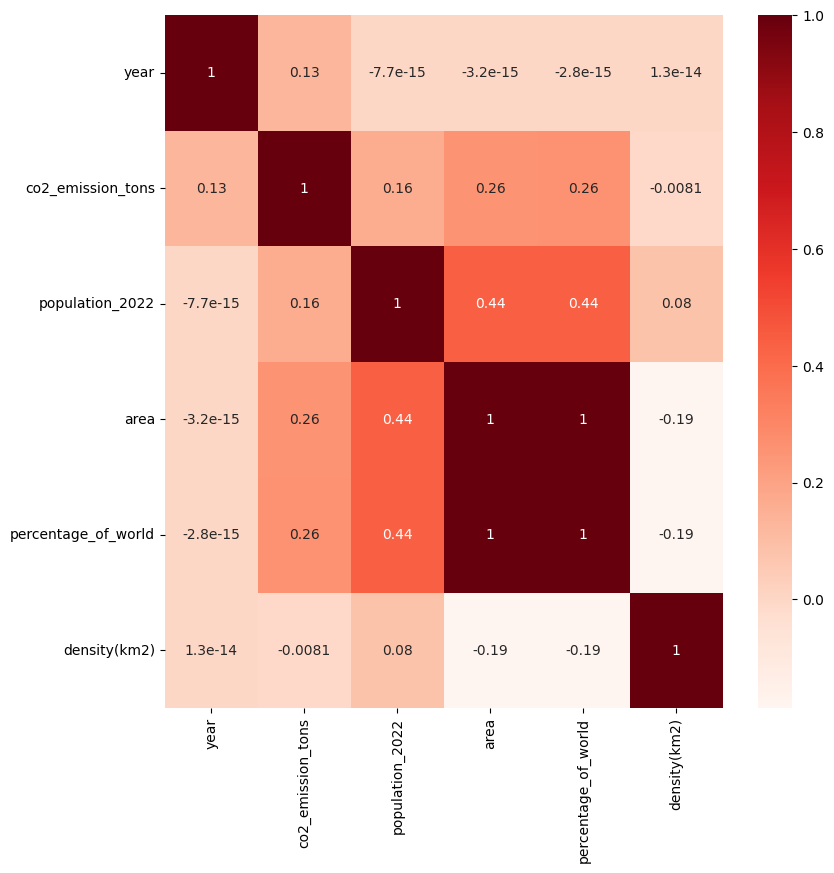

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(co2_dataset.corr(),cmap='Reds',annot=True)

#CO2 EMISSION

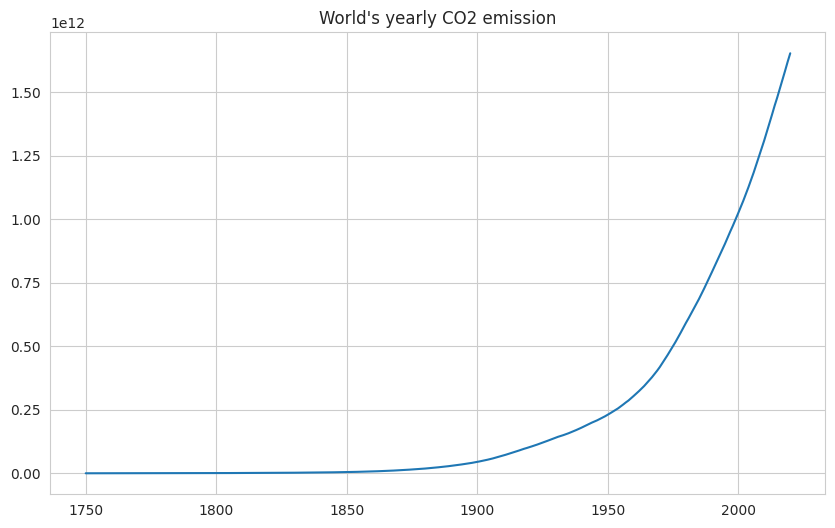

In [ ]:
world_emission = co2_dataset.groupby("year").sum()
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
plt.plot(world_emission .index, world_emission ["co2_emission_tons"])
plt.title("World's yearly CO2 emission");

#Top 30 cumulative CO2 emission countries in 2020

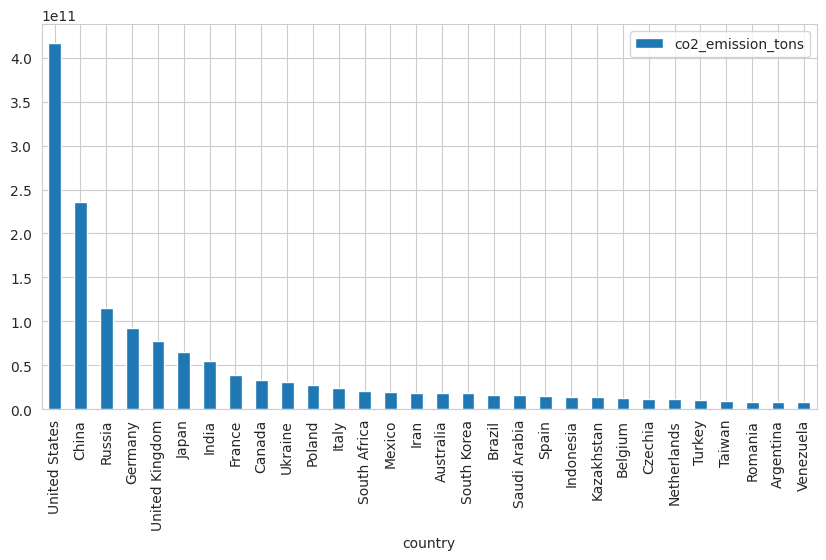

In [ ]:
co2_dataset[co2_dataset['year']==2020].sort_values(by='co2_emission_tons', 
            ascending=False).head(30).plot.bar(x='country',y='co2_emission_tons',figsize=(10,5));

# Top 10 countries with the highest CO2 emission in the last 5 years

In [ ]:
top10_emission = co2_dataset[(co2_dataset.year > 2014) &
                                (co2_dataset["year"] < 2023)].groupby("country")[
                                    ["co2_emission_tons"]].sum().sort_values(by=["co2_emission_tons"], ascending=False).head(10)

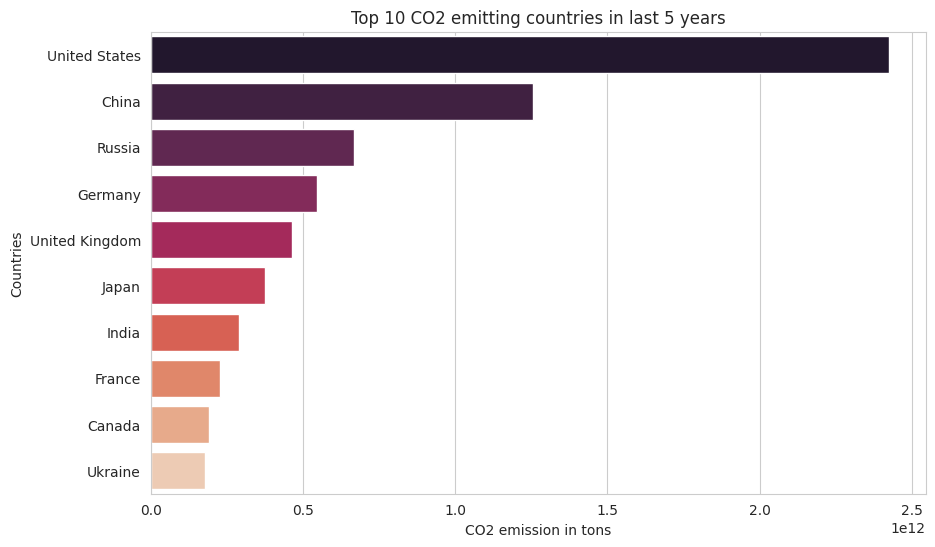

In [ ]:
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
sns.barplot(data=top10_emission, x="co2_emission_tons", y=top10_emission.index, palette="rocket")
plt.title("Top 10 CO2 emitting countries in last 5 years")
plt.xlabel("CO2 emission in tons")
plt.ylabel("Countries");


#Top 10 countries with the lowest CO2 emission in 5 years

In [ ]:
low10_emission = co2_dataset[(co2_dataset.year > 2014) & 
 (co2_dataset["year"] < 2023)].groupby("country")[
    ["co2_emission_tons"]].sum().sort_values(by=["co2_emission_tons"]).head(10)

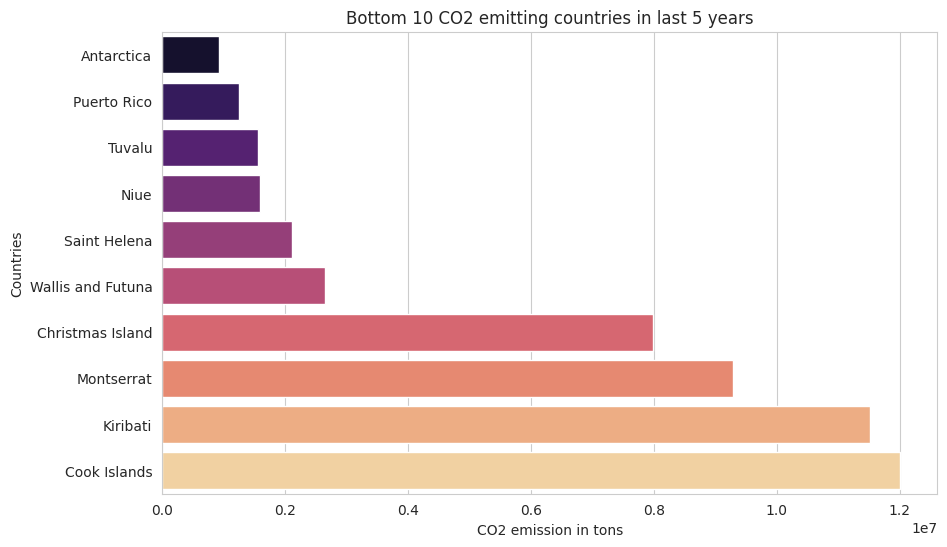

In [ ]:
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
sns.barplot(data=low10_emission, x="co2_emission_tons", y=low10_emission.index, palette="magma")
plt.title("Bottom 10 CO2 emitting countries in last 5 years")
plt.xlabel("CO2 emission in tons")
plt.ylabel("Countries");

#The highest CO2 emission from 1750-2020

In [ ]:
print(co2_dataset.groupby("year")[["co2_emission_tons"]].sum().sort_values(by="co2_emission_tons", ascending=False).head(1))

      co2_emission_tons
year                   
2020       1.654088e+12


#Pencentage of top 5 countries CO2 emissin in 2020

In [ ]:
co2_dataset[co2_dataset["year"]==2020].sort_values(by="co2_emission_tons", 
      ascending=False).head(5)["co2_emission_tons"].sum()/co2_dataset[co2_dataset["year"]==2020]["co2_emission_tons"].sum()

0.5675616513903374

#How much of the world population produced 57% of emission in 2020

In [ ]:
co2_dataset[co2_dataset["year"]==2020].sort_values(by="co2_emission_tons",
          ascending=False).head(5)["population_2022"].sum()/co2_dataset[co2_dataset["year"]==2020]["population_2022"].sum()

0.26323504999824004

26 percent of the world population produced 57 percent of the world co2 in 2020.

#  Top countries CO2 Emissino since 1750

In [ ]:
CO2_emission = pd.DataFrame(co2_dataset.groupby('country')[
                  ['country','co2_emission_tons']].mean().sort_values('co2_emission_tons', ascending=False).round(2).head(10))

fig = px.bar(CO2_emission, x = CO2_emission.index, y = 'co2_emission_tons', 
            title = 'Top Countries to emit Co2 since 1750',
             template = 'seaborn', color = CO2_emission.index, text = 'co2_emission_tons')
fig.show()

#The contries with the lowest CO2 emission since 1750

In [ ]:
CO2_emission= pd.DataFrame(co2_dataset.groupby('country')[
    ['country','co2_emission_tons']].mean().sort_values('co2_emission_tons', ascending=True).round(2).head(10))
fig = px.bar(CO2_emission, x = CO2_emission.index, y = 'co2_emission_tons',
            title = 'Lowest CO2 emission (Tons) countries since 1750',
             template = 'seaborn', color = CO2_emission.index, text = 'co2_emission_tons')
fig.show()

#Comparing TOP 5 countries in 2020

In [ ]:
top5_df = co2_dataset[(co2_dataset["country"]=="United States")|
 (co2_dataset["country"]=="China")|(co2_dataset["country"]=="Russia")|(co2_dataset["country"]=="Germany")
 |(co2_dataset["country"]=="United Kingdom")]
top5_df.head()

,country,code,calling_code,year,co2_emission_tons,population_2022,area,percentage_of_world,density(km2)
10569,China,CN,86,1750,0.0,1.425887e+09,9706961.0,6.3,147.0
10570,China,CN,86,1751,0.0,1.425887e+09,9706961.0,6.3,147.0
10571,China,CN,86,1752,0.0,1.425887e+09,9706961.0,6.3,147.0
10572,China,CN,86,1753,0.0,1.425887e+09,9706961.0,6.3,147.0
10573,China,CN,86,1754,0.0,1.425887e+09,9706961.0,6.3,147.0


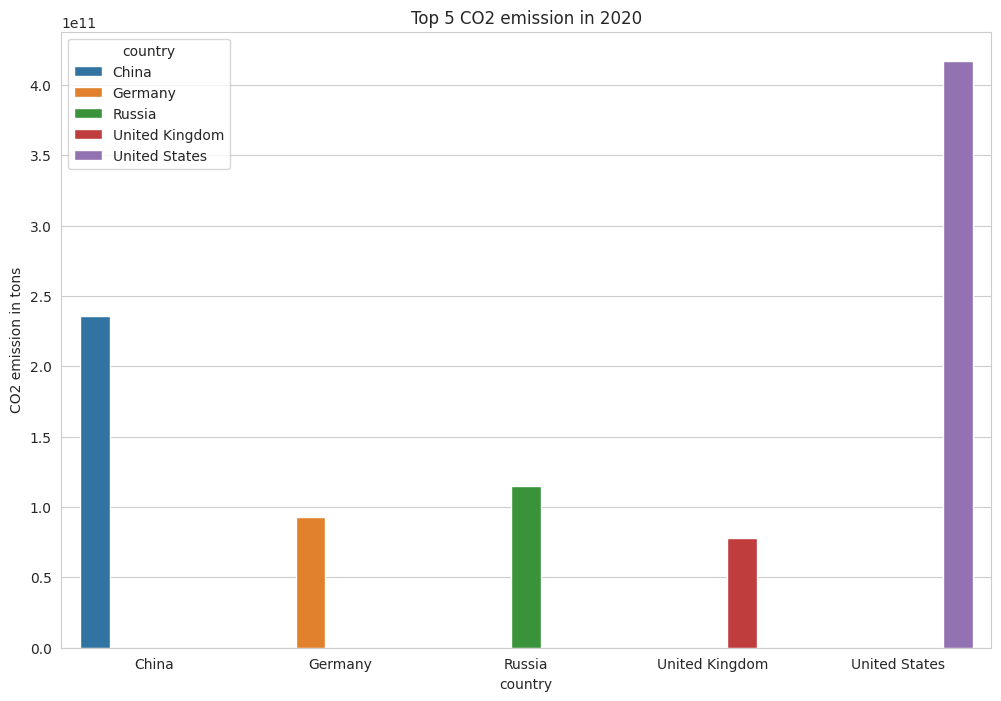

In [ ]:
top5_df[top5_df["year"]==2020]
fig = plt.figure(figsize = (12, 8))
sns.barplot(data=top5_df[top5_df["year"]==2020], x="country", y="co2_emission_tons", hue="country")
plt.title("Top 5 CO2 emission in 2020")
plt.ylabel("CO2 emission in tons");

#MAP

In [ ]:
top5_df['Country_iso3'] = country_converter.convert(names=top5_df['country'], to="ISO3")
top5_df.sample(10)

,country,code,calling_code,year,co2_emission_tons,population_2022,area,percentage_of_world,density(km2),Country_iso3
20263,Germany,DE,49,1959,3.544154e+10,8.336984e+07,357114.0,0.2,233.0,DEU
56685,United Kingdom,GB,44,1796,6.753851e+08,6.750894e+07,242900.0,0.2,278.0,GBR
56853,United Kingdom,GB,44,1964,4.712829e+10,6.750894e+07,242900.0,0.2,278.0,GBR
10688,China,CN,86,1869,0.000000e+00,1.425887e+09,9706961.0,6.3,147.0,CHN
20304,Germany,DE,49,2000,7.621667e+10,8.336984e+07,357114.0,0.2,233.0,DEU
20236,Germany,DE,49,1932,2.036294e+10,8.336984e+07,357114.0,0.2,233.0,DEU
57124,United States,US,1,1964,1.310000e+11,3.382899e+08,9372610.0,6.1,36.0,USA
57100,United States,US,1,1940,6.863612e+10,3.382899e+08,9372610.0,6.1,36.0,USA
44443,Russia,NaN,7,2020,1.150000e+11,1.447133e+08,17098242.0,11.0,8.0,RUS
10584,China,CN,86,1765,0.000000e+00,1.425887e+09,9706961.0,6.3,147.0,CHN


In [ ]:
px.choropleth(top5_df[top5_df["year"]==2020].sort_values('year'), 
              locations = 'Country_iso3',
              color="co2_emission_tons",
              animation_frame='year',
              color_continuous_scale ='OrRd',
              title='World CO2 emissions map for Top 5 courtries (USA, Chaina , Russia, UK, Garmany) in 2020' ,
              height=800)

In [ ]:
co2_dataset['Country_iso3'] = country_converter.convert(names=co2_dataset['country'], to="ISO3")


In [ ]:
px.choropleth(co2_dataset.sort_values('year'), 
              locations = 'Country_iso3',
              color="co2_emission_tons",
              animation_frame='year',
              color_continuous_scale ='OrRd',
              title='World CO2 emissions' ,
              height=800)

#PRE-PROCESSING

Droping unnecessary columns

In [ ]:
co2_dataset= co2_dataset.drop(['code','calling_code', 'Country_iso3'], axis=1)

In [ ]:
co2_dataset= co2_dataset.drop(['code','calling_code'], axis=1)

#Filling missing values

In [ ]:
#Duplicates
co2_dataset.nunique()

country                  220
year                     271
co2_emission_tons      18352
population_2022          196
area                     204
percentage_of_world       23
density(km2)             145
dtype: int64

In [ ]:
co2_dataset.isnull().sum()

country                   0
year                      0
co2_emission_tons         0
population_2022        6504
area                   4336
percentage_of_world    4336
density(km2)           6504
dtype: int64

In [ ]:
# checking for null data in %

null_values = (co2_dataset.isna().sum()/ co2_dataset.shape[0])*100
print(null_values)

country                 0.000000
year                    0.000000
co2_emission_tons       0.000000
population_2022        10.909091
area                    7.272727
percentage_of_world     7.272727
density(km2)           10.909091
dtype: float64


<Axes: >

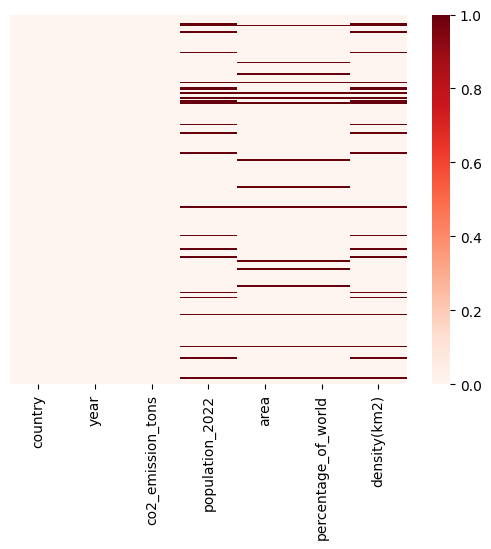

In [ ]:
sns.heatmap(co2_dataset.isnull(), cbar=True, yticklabels=False, cmap='Reds')

In [ ]:
co2_dataset.fillna(co2_dataset.mean(numeric_only=True).round(1), inplace=True)

In [ ]:
co2_dataset.isnull().sum()

country                0
year                   0
co2_emission_tons      0
population_2022        0
area                   0
percentage_of_world    0
density(km2)           0
dtype: int64

#Assigning each country a numerical value

In [ ]:
co2_dataset["country"].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antarctica', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Cape Verde', 'Central African Republic', 'Chad',
       'Chile', 'China', 'Christmas Island', 'Colombia', 'Comoros',
       'Congo', 'Cook Islands', 'Costa Rica', "Cote d'Ivoire", 'Croatia',
       'Cuba', 'Curacao', 'Cyprus', 'Czechia',
       'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia',
       'Faeroe Islands', 'Fiji', 'Finland', 'France', 'French G

In [ ]:
country_code=pd.DataFrame({'country':['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antarctica', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Cape Verde', 'Central African Republic', 'Chad',
       'Chile', 'China', 'Christmas Island', 'Colombia', 'Comoros',
       'Congo', 'Cook Islands', 'Costa Rica', "Cote d'Ivoire", 'Croatia',
       'Cuba', 'Curacao', 'Cyprus', 'Czechia',
       'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia',
       'Faeroe Islands', 'Fiji', 'Finland', 'France', 'French Guiana',
       'French Polynesia', 'Gabon', 'Gambia', 'Georgia', 'Germany',
       'Ghana', 'Greece', 'Greenland', 'Grenada', 'Guadeloupe',
       'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti',
       'Honduras', 'Hong Kong', 'Hungary', 'Iceland', 'India',
       'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy',
       'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Kiribati',
       'Kosovo', 'Kuwait', 'Kyrgyzstan', 'Laos', 'Latvia', 'Lebanon',
       'Lesotho', 'Liberia', 'Libya', 'Liechtenstein', 'Lithuania',
       'Luxembourg', 'Macao', 'Madagascar', 'Malawi', 'Malaysia',
       'Maldives', 'Mali', 'Malta', 'Marshall Islands', 'Martinique',
       'Mauritania', 'Mauritius', 'Mayotte', 'Mexico', 'Micronesia',
       'Moldova', 'Mongolia', 'Montenegro', 'Montserrat', 'Morocco',
       'Mozambique', 'Myanmar', 'Namibia', 'Nauru', 'Nepal',
       'Netherlands', 'New Caledonia', 'New Zealand', 'Nicaragua',
       'Niger', 'Nigeria', 'Niue', 'North Korea', 'North Macedonia',
       'Norway', 'Oman', 'Pakistan', 'Palau', 'Palestine', 'Panama',
       'Papua New Guinea', 'Paraguay', 'Peru', 'Philippines', 'Poland',
       'Portugal', 'Puerto Rico', 'Qatar', 'Reunion', 'Romania', 'Russia',
       'Rwanda', 'Saint Helena', 'Saint Kitts and Nevis', 'Saint Lucia',
       'Saint Pierre and Miquelon', 'Saint Vincent and the Grenadines',
       'Samoa', 'Sao Tome and Principe', 'Saudi Arabia', 'Senegal',
       'Serbia', 'Seychelles', 'Sierra Leone', 'Singapore',
       'Sint Maarten (Dutch part)', 'Slovakia', 'Slovenia',
       'Solomon Islands', 'Somalia', 'South Africa', 'South Korea',
       'South Sudan', 'Spain', 'Sri Lanka', 'Sudan', 'Suriname', 'Sweden',
       'Switzerland', 'Syria', 'Taiwan', 'Tajikistan', 'Tanzania',
       'Thailand', 'Timor', 'Togo', 'Tonga', 'Trinidad and Tobago',
       'Tunisia', 'Turkey', 'Turkmenistan', 'Turks and Caicos Islands',
       'Tuvalu', 'Uganda', 'Ukraine', 'United Arab Emirates',
       'United Kingdom', 'United States', 'Uruguay', 'Uzbekistan',
       'Vanuatu', 'Venezuela', 'Vietnam', 'Wallis and Futuna', 'Yemen',
       'Zambia', 'Zimbabwe']})

codes,uniques=pd.factorize(co2_dataset.country)
codes

array([  0,   0,   0, ..., 219, 219, 219])

In [ ]:
co2_dataset['country']=pd.Series(codes)


In [ ]:
co2_dataset[:8]

,country,year,co2_emission_tons,population_2022,area,percentage_of_world,density(km2)
0,0,1750,0.0,41128771.0,652230.0,0.4,63.0
1,0,1751,0.0,41128771.0,652230.0,0.4,63.0
2,0,1752,0.0,41128771.0,652230.0,0.4,63.0
3,0,1753,0.0,41128771.0,652230.0,0.4,63.0
4,0,1754,0.0,41128771.0,652230.0,0.4,63.0
5,0,1755,0.0,41128771.0,652230.0,0.4,63.0
6,0,1756,0.0,41128771.0,652230.0,0.4,63.0
7,0,1757,0.0,41128771.0,652230.0,0.4,63.0


#Importing libraries

In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score,confusion_matrix



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

In [ ]:
co2_dataset.columns

Index(['country', 'year', 'co2_emission_tons', 'population_2022', 'area',
       'percentage_of_world', 'density(km2)'],
      dtype='object')

In [ ]:
co2_dataset.shape

(59620, 7)

train_test_split

In [ ]:
X = co2_dataset.drop(['co2_emission_tons'],axis=1)
y = co2_dataset['co2_emission_tons']

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
scaler = StandardScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [ ]:
def metrics_display(model):
    model.fit(scaled_X_train,y_train)
    y_pred = model.predict(scaled_X_test)
    print(classification_report(y_test,y_pred))

#Logistic Regression 

In [ ]:
#Logistic Regression 

lr_model=LogisticRegression(solver='lbfgs',max_iter=50)
metrics_display(lr_model)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                precision    recall  f1-score   support

           0.0       0.64      1.00      0.78     11353
          75.0       0.00      0.00      0.00         1
         168.0       0.00      0.00      0.00         5
         184.0       0.00      0.00      0.00         1
         187.0       0.00      0.00      0.00         1
         197.0       0.00      0.00      0.00         1
         249.0       0.00      0.00      0.00         4
         300.0       0.00      0.00      0.00         6
         341.0       0.00      0.00      0.00         1
         428.0       0.00      0.00      0.00         2
         429.0       0.00      0.00      0.00         5
         435.0       0.00      0.00      0.00         3
         487.0       0.00      0.00      0.00         6
         535.0       0.00      0.00      0.00         1
         552.0       0.00      0.00      0.00         1
         570.0       0.00      0.00      0.00         1
         620.0       0.00      0.00      0.00  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

#K Neighbors Classifier

In [ ]:
# KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3)
metrics_display(knn)

                precision    recall  f1-score   support

           0.0       0.98      1.00      0.99     11353
          75.0       0.00      0.00      0.00         1
         165.0       0.00      0.00      0.00         0
         168.0       1.00      1.00      1.00         5
         184.0       0.00      0.00      0.00         1
         187.0       0.00      0.00      0.00         1
         190.0       0.00      0.00      0.00         0
         197.0       0.00      0.00      0.00         1
         243.0       0.00      0.00      0.00         0
         249.0       0.80      1.00      0.89         4
         268.0       0.00      0.00      0.00         0
         300.0       1.00      0.83      0.91         6
         341.0       0.00      0.00      0.00         1
         428.0       1.00      1.00      1.00         2
         429.0       1.00      1.00      1.00         5
         435.0       1.00      1.00      1.00         3
         487.0       1.00      0.83      0.91  

# Gaussian Naive Bayes

In [ ]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
metrics_display(gaussian)


                precision    recall  f1-score   support

           0.0       0.82      0.28      0.42     11353
          75.0       0.00      0.00      0.00         1
         168.0       0.19      1.00      0.32         5
         184.0       0.00      0.00      0.00         1
         187.0       0.00      0.00      0.00         1
         197.0       0.00      0.00      0.00         1
         249.0       0.15      1.00      0.27         4
         300.0       0.29      1.00      0.44         6
         341.0       0.00      0.00      0.00         1
         428.0       1.00      1.00      1.00         2
         429.0       0.18      1.00      0.30         5
         435.0       0.33      1.00      0.50         3
         487.0       0.32      1.00      0.48         6
         535.0       0.00      0.00      0.00         1
         552.0       0.00      0.00      0.00         1
         570.0       0.00      0.00      0.00         1
         620.0       0.29      1.00      0.45  

# Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier() 
metrics_display(decision_tree)


                precision    recall  f1-score   support

           0.0       1.00      1.00      1.00     11353
          75.0       0.00      0.00      0.00         1
         137.0       0.00      0.00      0.00         0
         155.0       0.00      0.00      0.00         0
         165.0       0.00      0.00      0.00         0
         168.0       1.00      1.00      1.00         5
         184.0       0.00      0.00      0.00         1
         187.0       0.00      0.00      0.00         1
         197.0       0.00      0.00      0.00         1
         225.0       0.00      0.00      0.00         0
         243.0       0.00      0.00      0.00         0
         249.0       1.00      1.00      1.00         4
         300.0       1.00      0.83      0.91         6
         341.0       0.00      0.00      0.00         1
         405.0       0.00      0.00      0.00         0
         418.0       0.00      0.00      0.00         0
         428.0       1.00      1.00      1.00  

In [ ]:
#RandomForestClassifier

#random_forest=RandomForestClassifier()
#metrics_display(random_forest)

In [ ]:
#SVM

#svc = SVC()
#metrics_display(svc)

Reference:  https://www.kaggle.com/datasets/moazzimalibhatti/co2-emission-by-countries-year-wise-17502022/code

#Thank You